In [1]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

obama_image = face_recognition.load_image_file("faces\chandru.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

biden_image = face_recognition.load_image_file("faces\saravanan.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Chandru",
    "Saravana"
]
print('Learned encoding for', len(known_face_encodings), 'images.')



Learned encoding for 2 images.


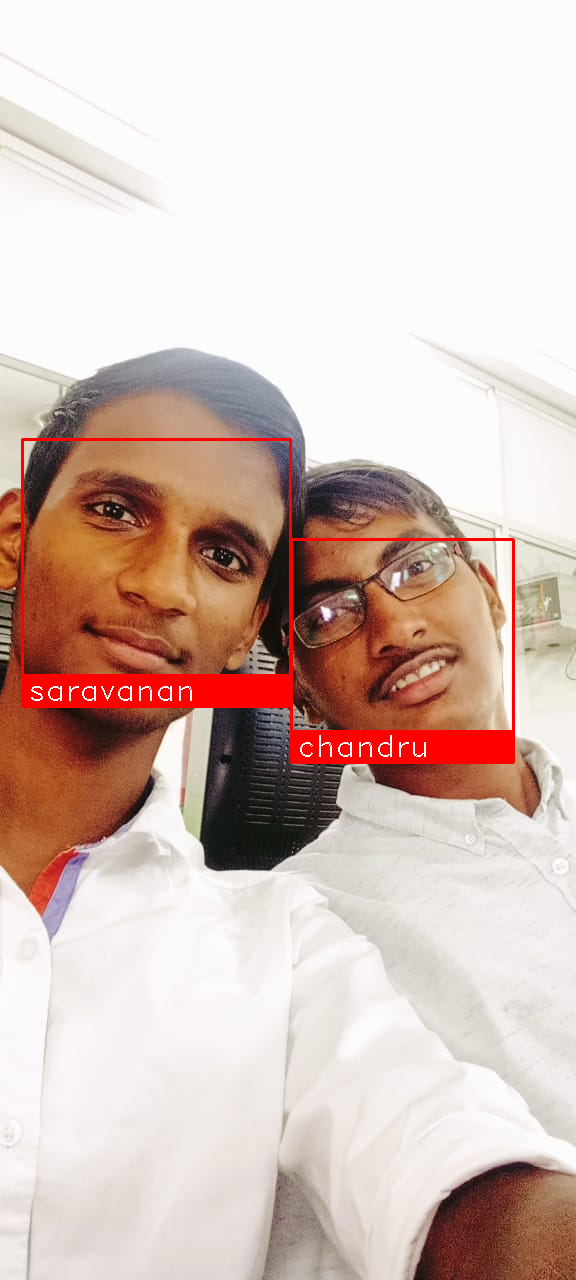

In [5]:
import face_recognition
import numpy as np
import cv2
from IPython.display import display, Image

unknown_image = face_recognition.load_image_file("WhatsApp Image 2024-02-15 at 20.29.04_eb4863b6.jpg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

image = cv2.imread("WhatsApp Image 2024-02-15 at 20.29.04_eb4863b6.jpg")

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_DUPLEX
    text_size = cv2.getTextSize(name, font, 1, 2)[0]
    cv2.rectangle(image, (left, bottom - text_size[1] - 10), (right, bottom), (0, 0, 255), cv2.FILLED)
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

_, img_encoded = cv2.imencode('.png', image)
display(Image(data=img_encoded))


In [9]:
import face_recognition
import numpy as np
import os
import pickle

def save_known_faces(known_face_encodings, known_face_names, filename):
    with open(filename, 'wb') as f:
        pickle.dump((known_face_encodings, known_face_names), f)

def encode_images_from_folder(folder_path, encoding_file):
    known_face_encodings = []
    known_face_names = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            image_path = os.path.join(folder_path, file_name)
            image = face_recognition.load_image_file(image_path)
            
            face_encoding = face_recognition.face_encodings(image)
            
            if len(face_encoding) > 0:
                known_face_encodings.append(face_encoding[0])
                known_face_names.append(os.path.splitext(file_name)[0])
            else:
                print(f"No face found in {file_name}")

    save_known_faces(known_face_encodings, known_face_names, encoding_file)


folder_path = "faces"
encoding_file = "known_faces.pkl"

encode_images_from_folder(folder_path, encoding_file)


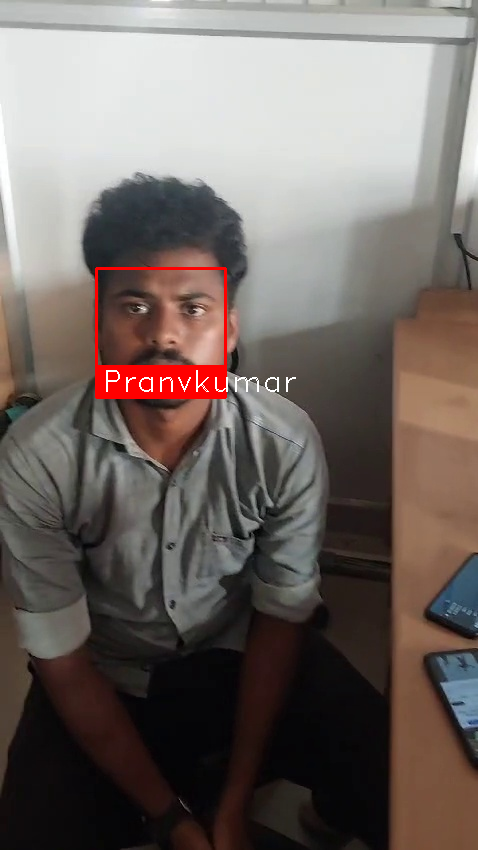

In [13]:
import face_recognition
import numpy as np
import cv2
from IPython.display import display, Image
import os
import pickle


image_path = r"C:\Users\thamb\OneDrive\Desktop\chandru\output_frames\frame_0034.jpg"

def load_known_faces(filename):
    with open(filename, 'rb') as f:
        known_face_encodings, known_face_names = pickle.load(f)
    return known_face_encodings, known_face_names

known_face_encodings, known_face_names = load_known_faces('known_faces.pkl')

unknown_image = face_recognition.load_image_file(image_path)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

image = cv2.imread(image_path)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_DUPLEX
    text_size = cv2.getTextSize(name, font, 1, 2)[0]
    cv2.rectangle(image, (left, bottom - text_size[1] - 10), (right, bottom), (0, 0, 255), cv2.FILLED)
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

_, img_encoded = cv2.imencode('.png', image)
display(Image(data=img_encoded))
